In [1]:
from sympy import Derivative, symbols, diff, simplify, lambdify
from sympy import Symbol
from sympy import cosh,sin,atan,exp,tanh

import sympy as sp

# 定义一个符号变量
x = sp.symbols('x')
# 定义自定义函数
class sigmoid(sp.Function):
    @classmethod
    def eval(cls, x):
        # 自定义函数逻辑，例如 sigmoid
        return 1 / (1 + sp.exp(-x))

In [2]:
x1, x2, x3, x4, x5, x6, x7, x8 = symbols('x1 x2 x3 x4 x5 x6 x7 x8')
dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8 = symbols('dx1 dx2 dx3 dx4 dx5 dx6 dx7 dx8')
# 定义表达式内容
# 0.4586*
Y = 0.458*(-0.291*x1 + 
           0.001*x2 + 
           0.352*x3 + 
           0.085*x4 - 
           0.116*x5 - 
           0.195*x6 - 
           0.204*sin(0.372*x7 + 0.059) +
           0.374*sin(0.749*x7 + 0.199) - 
           0.565*sin(0.761*x7 - 0.068) +
           0.668*sin(1.167*x7 + 0.220) - 
           0.609*sin(1.507*x7 + 0.288) + 
           1.354*sin(1.632*x7 + 0.946) + 
           0.187*sin(0.254*x8 + 0.637) + 
           0.233*sin(0.540*x8 - 0.070) - 
           0.718*sin(0.933*x8 - 0.701) - 
           0.694*sin(1.057*x8 - 0.423) - 
           0.380*sin(1.324*x8 - 0.899) + 
           0.327*sin(1.844*x8 + 0.256) - 
           0.495)

# -0.29122776114082*x_1 + 0.00185866551870709*x_2 + 0.352386277729838*x_3 + 0.0855323258684213*x_4 - 
# 0.116782281491397*x_5 - 0.195454797679714*x_6 - 0.204122786540415*sin(0.372867077589035*x_7 + 0.0599833391606808) + 
# 0.374173460014447*sin(0.749041438102722*x_7 + 0.199507713317871) - 0.56555753094921*sin(0.761289179325104*x_7 - 0.0680777505040169) +
# 0.66844679793255*sin(1.16741156578064*x_7 + 0.220314964652061) - 0.609300574153178*sin(1.50747001171112*x_7 + 0.288085103034973) + 
# 1.35432414749317*sin(1.63282144069672*x_7 + 0.946830451488495) + 0.187945014252172*sin(0.25432351231575*x_8 + 0.637353777885437) + 0.233814279425833*sin(0.540887475013733*x_8 - 0.0709342882037163) - 0.718190888014035*sin(0.933764100074768*x_8 - 0.701989591121674) - 0.694628630890918*sin(1.05783343315125*x_8 - 0.423908978700638) - 0.3807644483204*sin(1.3249226808548*x_8 - 0.899636805057526) + 
# 0.327285861461678*sin(1.84400033950806*x_8 + 0.256447076797485) - 0.495658103059504
# Y = (-0.147878405436938*x1 +
#         0.0705247522572326*x2 + 
#         0.260715547621237*x3 - 
#         0.0595831004376474*x4 -
#         0.0665124675244903*x5 - 
#         0.0961854641799234*x6 - 
#         0.199940860255781*sin(0.533616423606873*x7 + 0.0406286790966988) - 
#         0.0780071270595302*sin(0.713795185089111*x7 - 0.146193221211433) + 
#         0.120360933303804*sin(0.835395514965057*x7 + 0.211806073784828) + 
#         0.107377870258644*sin(1.29021561145782*x7 + 0.318071395158768) + 
#         0.961805992118203*sin(1.55316507816315*x7 + 0.941126823425293) - 
#         0.167863159751351*sin(1.58420360088348*x7 + 0.322238087654114) + 
#         0.140243869878714*sin(0.219426289200783*x8 + 0.647644519805908) + 
#         0.0422295616254414*sin(0.60089635848999*x8 - 0.0163751244544983) - 
#         0.114188251277058*sin(0.949861168861389*x8 - 0.546780288219452) - 
#         0.562417090685424*sin(1.06847858428955*x8 - 0.472326159477234) - 
#         0.126235427403802*sin(1.38979625701904*x8 - 0.840504705905914) + 
#         0.105112312769297*sin(1.8430061340332*x8 + 0.181359648704529) - 0.397999839548226)


In [3]:
approx_Y = (Y +
            diff(Y, x1)*dx1 +
            diff(Y, x2)*dx2 + 
            diff(Y, x3)*dx3 + 
            diff(Y, x4)*dx4 +
            diff(Y, x5)*dx5 +
            diff(Y, x6)*dx6 + 
            diff(Y, x7)*dx7 +
            diff(Y, x8)*dx8)

f = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8], 
             approx_Y) 

f_Y = lambdify([x1,x2,x3,x4,x5,x6,x7,x8], 
               Y) 

In [4]:
from kan import *
import pytz
import time
import datetime
from data_process import data_process_without_norm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import copy
import pandas as pd

df = data_process_without_norm()
df = df.drop("entsoe",axis=1)
loc_tz = pytz.timezone('Europe/Zurich')
split_date_train_ = loc_tz.localize(datetime.datetime(2016,1,1,0,0,0,0))
split_date_train = loc_tz.localize(datetime.datetime(2016,3,1,0,0,0,0))
split_date_test = loc_tz.localize(datetime.datetime(2016,3,15,0,0,0,0))

df_train_ = df.loc[(split_date_train_ < df.index)]
df_train = df_train_.loc[df_train_.index <= split_date_train].copy()
_temp_df = df.loc[split_date_test > df.index]
df_test = _temp_df.loc[_temp_df.index > split_date_train].copy()

# Input standardization
scaler_input = StandardScaler()
# scaler_input = MinMaxScalerr()
_temp_scaled_input_data = scaler_input.fit_transform(df_train.iloc[:,1:])
x_train_input = _temp_scaled_input_data

#Output standardization
scaler_output = StandardScaler()
# scaler_input = MinMaxScaler()
_temp_scaled_output_data = scaler_output.fit_transform(np.array(df_train.iloc[:,0]).reshape(-1,1))
x_train_label = _temp_scaled_output_data

#Test set standardization
x_test_input = scaler_input.transform(df_test.iloc[:,1:])
x_test_label = scaler_output.transform(np.array(df_test.iloc[:,0]).reshape(-1,1))

_temp_test_input = np.hstack((x_test_input[:,:8],x_test_input[:,-3:-1]))
_temp_test_label = x_test_label
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

_temp_train_input = np.hstack((x_train_input[:, :8], x_train_input[:, -3:-1]))
_temp_train_label = x_train_label

# 将数据转换为 PyTorch 张量
train_input_tensor = torch.tensor(_temp_train_input.astype(np.float32))
train_label_tensor = torch.tensor(_temp_train_label.astype(np.float32))

test_input_tensor = torch.tensor(_temp_test_input.astype(np.float32))
test_label_tensor = torch.tensor(_temp_test_label.astype(np.float32))


In [5]:
dataset = dict()
dataset['train_input'] = torch.tensor(_temp_train_input.astype(np.float32))
dataset['train_label'] = torch.tensor(_temp_train_label.astype(np.float32))

dataset['test_input'] = torch.tensor(_temp_test_input.astype(np.float32))
dataset['test_label'] = torch.tensor(_temp_test_label.astype(np.float32))


In [6]:
def revise_dataset(dataset,input_index):
    dataset['train_input'] = dataset['train_input'][:,input_index]
    dataset['test_input'] = dataset['test_input'][:,input_index]
    return dataset
true_indices = [0, 2, 3, 4, 6, 7, 8, 9]
dataset = revise_dataset(dataset,true_indices)

In [7]:
import time
sample_nums= 100
pre_Y_appro = []
pre_Y_appro_one_order = []
pre_Y = []
delta_Y = []
start_time = time.time()
for i,_data in enumerate(dataset['test_input']):
    pre_Y_appro.append([])
    for sample in range(sample_nums):
        dx = np.random.normal(loc = 0, scale = 0.1, size = (6)).tolist()
        dx.append(0)
        dx.append(0)
        dx = np.array(dx)
        _approx_Y = f(_data[0],
                      _data[1],
                      _data[2],
                      _data[3],
                      _data[4],
                      _data[5],
                      _data[6],
                      _data[7],
                      dx[0],
                      dx[1],
                      dx[2],
                      dx[3],
                      dx[4],
                      dx[5],
                      dx[6],
                      dx[7])
        
        pre_Y_appro[i].append(_approx_Y)
    dx = np.zeros(10)
    _approx_Y_one_order = f(_data[0],
                      _data[1],
                      _data[2],
                      _data[3],
                      _data[4],
                      _data[5],
                      _data[6],
                      _data[7],
                      dx[0],
                      dx[1],
                      dx[2],
                      dx[3],
                      dx[4],
                      dx[5],
                      dx[6],
                      dx[7])
    pre_Y_appro_one_order.append(_approx_Y_one_order)
    _f_Y = f_Y(_data[0],
              _data[1],
              _data[2],
              _data[3],
              _data[4],
              _data[5],
              _data[6],
              _data[7])
    pre_Y.append(_f_Y)
    delta_Y.append(_f_Y-dataset['test_label'][i,0])
end_time = time.time()
print(end_time-start_time)

49.151358127593994


In [8]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import gridspec

In [9]:
from scipy.stats import norm,shapiro
mean = np.mean(delta_Y)
std_dev = np.std(delta_Y, ddof=1)  # 这是 S 图的样本标准差

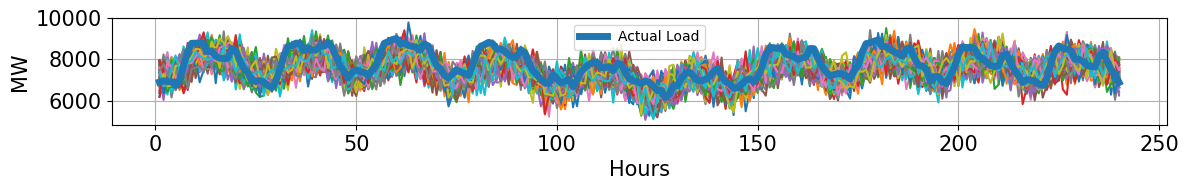

In [11]:
fontsize=12

fig = plt.figure(figsize=(12,2))
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)
pre_Y_appro_T = np.array(pre_Y_appro).T
actual_pre_Y_appro_T = []
for i in pre_Y_appro_T:
    _temp_data = i+np.random.normal(mean,std_dev,size=335)
    plt.plot(x_data,scaler_output.inverse_transform(_temp_data[:240].reshape(1,-1)).reshape(-1),)
    actual_pre_Y_appro_T.append(_temp_data.tolist())
    
# plt.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
plt.plot(x_data,scaler_output.inverse_transform(dataset['test_label'][:240].detach().numpy()),label = 'Actual Load',linewidth=5)
plt.grid()
plt.legend(fontsize=10)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("MW",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

fig.savefig('./Interpretable_COMPARE_SPRING.svg',dpi=300, bbox_inches='tight')